## Linear regression
Problem Statement: <br>
Salary_hike -> Build a prediction model for Salary_hike<br>
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

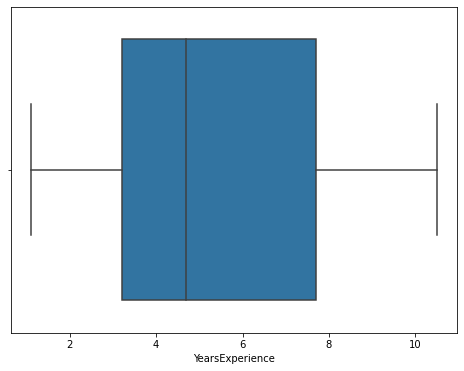

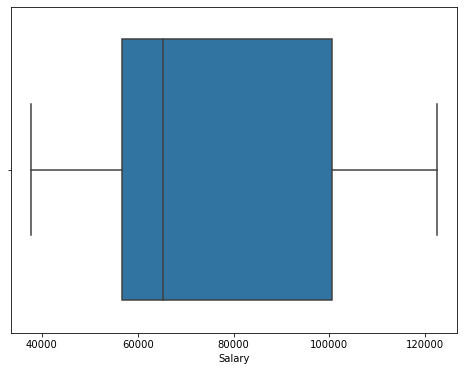

In [5]:
#Checking for outliers with help of boxplot
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.YearsExperience)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.Salary)
plt.show()

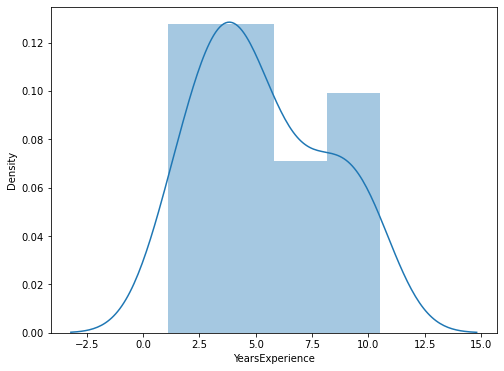

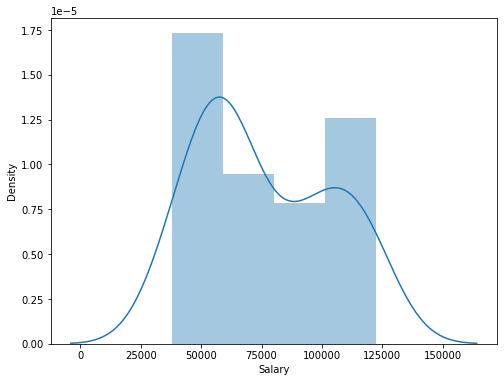

In [6]:
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.YearsExperience)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.Salary)
plt.show()

#### It looks like there are no outliers present in the datset

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

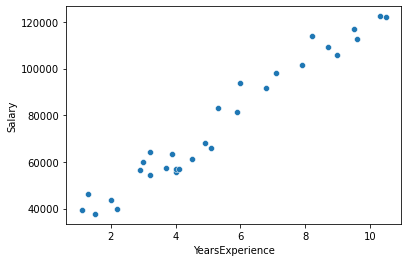

In [8]:

# scatterplot of input variable i.e., sorting time Vs. output variable i.e., delivery time
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])

#### From above scatter plot, increase in sorting time leads to increase delivery time

# Correlation

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


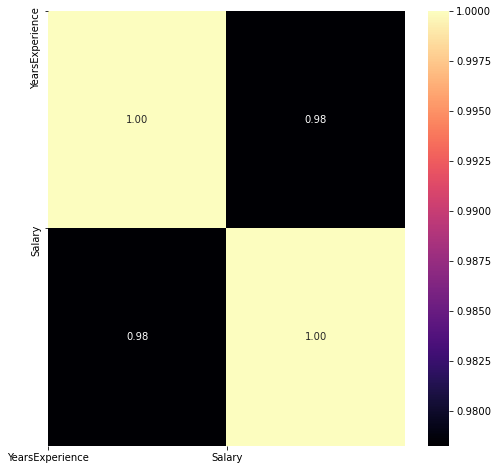

In [10]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Fitting a Linear Regression Model

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("data['Salary']~data['YearsExperience']",data = data).fit()

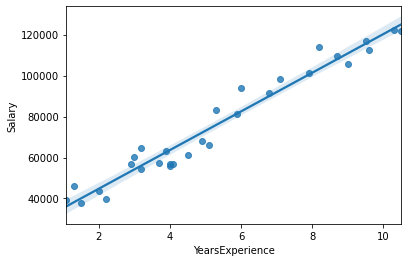

In [12]:
sns.regplot(y="Salary", x="YearsExperience", data=data);

In [13]:
#Coefficients
model.params

Intercept                  25792.200199
data['YearsExperience']     9449.962321
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept                  11.346940
data['YearsExperience']    24.950094
dtype: float64 
 Intercept                  5.511950e-12
data['YearsExperience']    1.143068e-20
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data['Salary']   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        20:57:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
data['YearsExperience']  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking predictions of Model by equation

 Y = B0 + B1X


In [61]:
predicted_salary = model.predict(data.YearsExperience)
pred_df = pd.DataFrame({'salary_Actual' : data.Salary, 'salary_Predicted' : predicted_salary})
pred_df

,salary_Actual,salary_Predicted
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


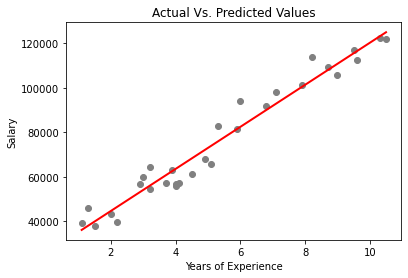

In [62]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.YearsExperience, data.Salary,  color='gray')
plt.plot(data.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Error calculation

In [63]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(data.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data.Salary, predicted_salary))


Mean Absolute Error: 4644.2012894435375
Mean Squared Error: 31270951.722280968
Root Mean Squared Error: 5592.043608760662
R^2 Score :           0.9569566641435086


#### Anderson-Darling test for normal distribution to check the normality of the residuals

p-value from the test: below 0.05 generally means non-normal: 0.42797598800582143
Residuals are normally distributed


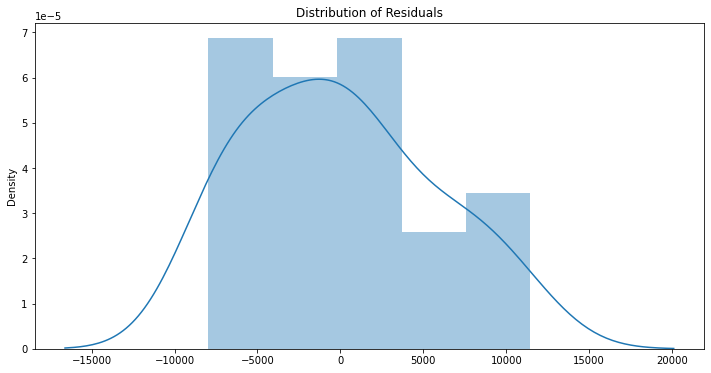

In [64]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

### Prediction using other models/transformations

#### Exponential transformation<br>
log(Y) =α + βX + ε

In [65]:
data1 = data.copy()
data1['log_salary'] = np.log(data1.Salary)
data1.head()

,YearsExperience,Salary,log_salary
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


In [31]:
exp_model = smf.ols('log_salary ~ YearsExperience', data = data1).fit()

In [32]:
# Coefficients Bo and B1
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("Years of Experience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  10.507401896588272
Years of Experience, B1:  0.1254528892608573
tvalue:  Intercept          273.327166
YearsExperience     19.584833
dtype: float64
pvalue:  Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
R2:  0.9319671194084196
R2_Adj:  0.929537373673006


Checking predictions of Model by equation<br>
log(Y) = Bo + B1X + e


In [34]:
predicted_salary = exp_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'salary Actual' : data1.log_salary, 'salary Predicted' : predicted_salary})
pred_df

,salary Actual,salary Predicted
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


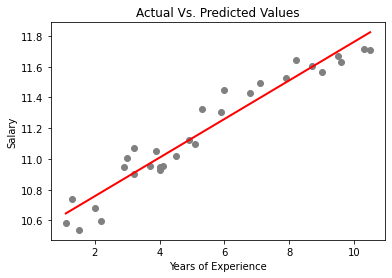

In [37]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.log_salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### error calculation

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.log_salary, predicted_salary))


Mean Absolute Error: 0.07981492426092238
Mean Squared Error: 0.008944311172030277
Root Mean Squared Error: 0.09457436847280704
R^2 Score :           0.9319671194084196


In [39]:
pred_df = pd.DataFrame({'Actual': np.exp(data1.log_salary), 'Predicted': np.exp(predicted_salary)})
pred_df

,Actual,Predicted
0,39343.0,41998.957468
1,46205.0,43066.066794
2,37731.0,44160.289228
3,43525.0,47019.029189
4,39891.0,48213.688474
5,56642.0,52639.142472
6,60150.0,53303.675386
7,54445.0,54658.014935
8,64445.0,54658.014935
9,57189.0,58196.330788


#### Checking Normality of Residuals Using the Anderson-Darling test

p-value from the test: below 0.05 generally means non-normal: 0.13649327468340658
Residuals are normally distributed


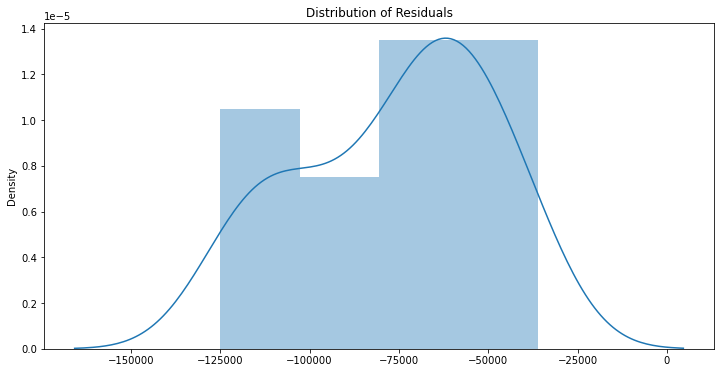

In [41]:
residuals = data1.log_salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [42]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           7.03e-18
Time:                        21:08:19   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square root transformation <br>
√Y = a + b * X + e

In [43]:
# preparing data to build model
data1['sqrt_salary'] = np.sqrt(data1.Salary)
data1.head()

,YearsExperience,Salary,log_salary,sqrt_salary
0,1.1,39343.0,10.580073,198.350700
1,1.3,46205.0,10.740843,214.953483
2,1.5,37731.0,10.538237,194.244691
3,2.0,43525.0,10.681091,208.626460
4,2.2,39891.0,10.593906,199.727314


In [44]:
sqrt_model = smf.ols('sqrt_salary ~ YearsExperience', data = data1).fit()

In [45]:
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("Years of Experience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  180.70022140543097
Years of Experience, B1:  17.05653205024198
tvalue:  Intercept          40.646251
YearsExperience    23.025247
dtype: float64
pvalue:  Intercept          1.920194e-26
YearsExperience    9.782891e-20
dtype: float64
R2:  0.9498353533865289
R2_Adj:  0.9480437588646192


##### Checking predictions of Model by equation
√Y = Bo + B1X + e

In [46]:
predicted_salary = sqrt_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'salary_Actual' : data1.sqrt_salary, 'salary_Predicted' : predicted_salary})
pred_df

,salary_Actual,salary_Predicted
0,198.350700,199.462407
1,214.953483,202.873713
2,194.244691,206.285019
3,208.626460,214.813286
4,199.727314,218.224592
5,237.995798,230.164164
6,245.254969,231.869818
7,233.334524,235.281124
8,253.860198,235.281124
9,239.142217,243.809390


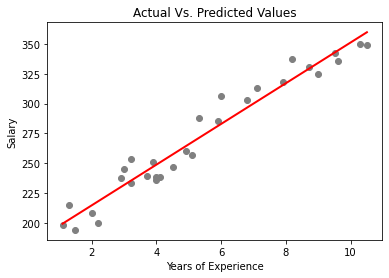

In [47]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.sqrt_salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Error calculation

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_salary, predicted_salary))

Mean Absolute Error: 9.321657712741537
Mean Squared Error: 119.61845560327346
Root Mean Squared Error: 10.937022245715397
R^2 Score :           0.9498353533865289


In [49]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_salary)**2, 'Predicted': (predicted_salary)**2})
pred_df

,Actual,Predicted
0,39343.0,39785.251671
1,46205.0,41157.743455
2,37731.0,42553.509262
3,43525.0,46144.747630
4,39891.0,47621.972517
5,56642.0,52975.542551
6,60150.0,53763.612294
7,54445.0,55357.207295
8,64445.0,55357.207295
9,57189.0,59443.018648


##### Anderson-Darling test

p-value from the test: below 0.05 generally means non-normal: 0.11907877807580869
Residuals are normally distributed


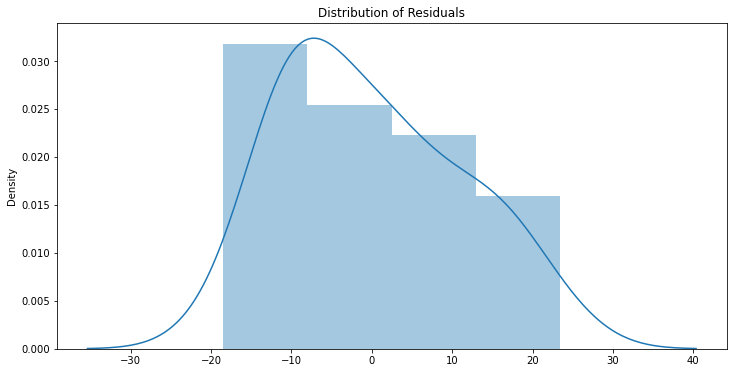

In [50]:
residuals = data1.sqrt_salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [51]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           9.78e-20
Time:                        21:13:06   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Logarithmic transformation<br>
Y = a + b * log(x)

In [52]:

data1 = pd.DataFrame.copy(data)
data1['log_salary'] = np.log(data1.YearsExperience)
data1.head()

,YearsExperience,Salary,log_salary
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [53]:
# Building model
log_model = smf.ols('Salary ~ log_salary', data = data1).fit()

In [54]:
# Coefficients Bo and B1
B0, B1 = log_model.params
print("Intercept, B0: ", B0)
print("Years of Experience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, B0:  14927.971770057284
Years of Experience, B1:  40581.98795977904
tvalue:  Intercept      2.895135
log_salary    12.791989
dtype: float64
pvalue:  Intercept     7.268813e-03
log_salary    3.250155e-13
dtype: float64
R2:  0.853888882875697
R2_Adj:  0.8486706286926862


##### Checking predictions of Model by equation
 Y = B0 + B1*log(X)


In [56]:
predicted_salary = log_model.predict(data1.log_salary)
pred_df = pd.DataFrame({'salarye actual' : data1.Salary, 'salary Predicted' : predicted_salary})
pred_df

,salarye actual,salary Predicted
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875
5,56642.0,58136.050079
6,60150.0,59511.842441
7,54445.0,62130.943929
8,64445.0,62130.943929
9,57189.0,68022.718504


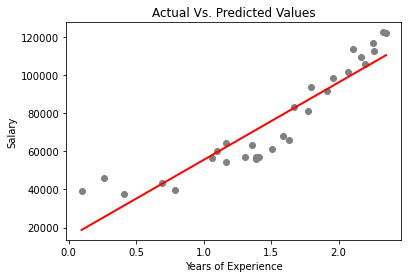

In [57]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.log_salary, data1.Salary,  color='gray')
plt.plot(data1.log_salary, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.Salary, predicted_salary))




Mean Absolute Error: 8443.584664486356
Mean Squared Error: 106149618.72183879
Root Mean Squared Error: 10302.893706228304
R^2 Score :           0.853888882875697


##### Anderson-Darling test

p-value from the test: below 0.05 generally means non-normal: 0.4374194094941122
Residuals are normally distributed


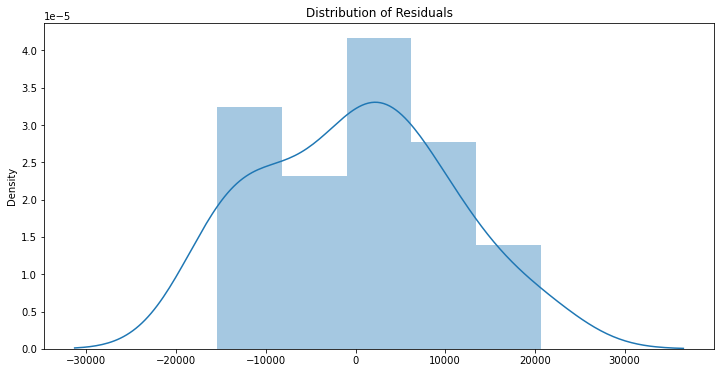

In [59]:
residuals = data1.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [60]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           3.25e-13
Time:                        21:17:22   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_salary  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Summary of various models

In [66]:
#Linear regression Model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data['Salary']   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        21:19:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
data['YearsExperience']  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# LOg transformation
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           3.25e-13
Time:                        21:19:29   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_salary  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Exponential 
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           7.03e-18
Time:                        21:19:30   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Square root
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           9.78e-20
Time:                        21:19:31   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""